In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.8 MB/s eta 0:00:58
   ---------------------------------------- 0.8/102.4 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 1.0/102.4 MB 1.8 MB/s eta 0:00:58
    --------------------------------------- 1.6/102.4 MB 1.7 MB/s eta 0:00:58
    --------------------------------------- 1.8/102.4 MB 1.7 MB/s eta 0:00:59
   - -------------------------------------- 2.6/102.4 MB 2.0 MB/s eta 0:00:51
   - -------------------------------------- 3.1/102.4 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.1/102.4 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.1/102.4 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.1/102.4 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.7/102.4 MB 1.5 MB/s eta 0:01:06


In [5]:
df=pd.read_csv('student.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [9]:
X=df.drop('math_score',axis=1)

In [11]:
y=df['math_score']

In [12]:
X.shape

(1000, 7)

In [13]:
y.shape

(1000,)

In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [15]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

#### split data into train and test 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [20]:
X_train.shape,y_train.shape

((800, 19), (800,))

In [21]:
X_test.shape,y_test.shape

((200, 19), (200,))

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2888
- Mean Absolute Error: 4.2118
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4823
- Mean Absolute Error: 4.4091
- R2 Score: 0.8652


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5076
- Mean Absolute Error: 5.1400
- R2 Score: 0.8166
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7212
- Mean Absolute Error: 5.2705
- R2 Score: 0.7974


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2890
- Mean Absolute Error: 4.2120
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4808
- Mean Absolute Error: 4.4050
- R2 Score: 0.8652


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8347
- Mean Absolute Error: 4.5717
- R2 Score: 0.8526
-----------------------

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.52


Text(0, 0.5, 'Predicted')

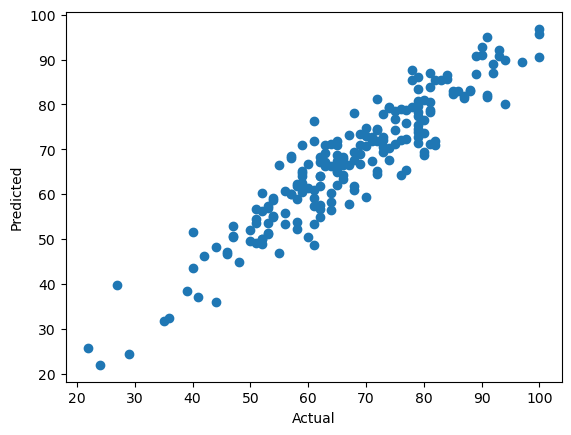

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

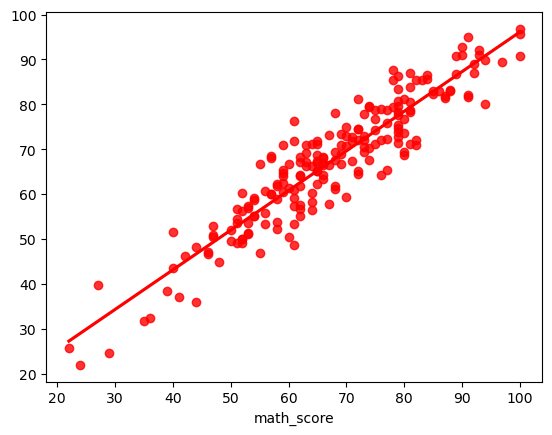

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
825,62,67.093271,-5.093271
374,59,63.980555,-4.980555
488,64,60.314319,3.685681
608,61,60.922198,0.077802
42,53,56.822933,-3.822933
...,...,...,...
664,80,69.350697,10.649303
962,100,96.840139,3.159861
144,88,82.939271,5.060729
955,72,71.955038,0.044962
